## 自创数据集聚类尝试

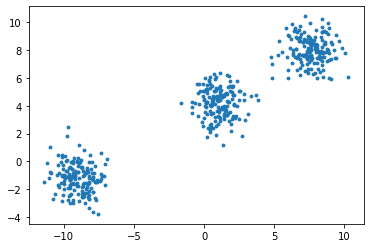

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500,n_features=4,random_state=3)

fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0]
            ,X[:,1]
            ,marker = 'o'
            ,s=8
           )
plt.show()

In [11]:
import pandas as pd
df = pd.DataFrame(X)

In [17]:
df.iloc[:,0]

0       7.037971
1       0.153650
2     -10.027602
3       1.711442
4       1.272518
         ...    
495     7.227537
496    -9.671676
497     0.262623
498   -10.100110
499     7.757591
Name: 0, Length: 500, dtype: float64

In [18]:
from sklearn.cluster import KMeans

n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

y_pred = cluster.labels_

In [26]:
y_pred = cluster.labels_

In [23]:
# 大概意识是可以有两种方式获得Kmeans预测后的标签
# 一种是通过labels_属性
# 另一种是通过fit_predict函数
pre = cluster.fit_predict(X)
pre == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [27]:
cluster_smallsub = KMeans(n_clusters=n_clusters, random_state=0).fit(X[:200])
y_pred_ = cluster_smallsub.predict(X)
y_pred == y_pred_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [28]:
centroid = cluster.cluster_centers_
centroid

array([[ 7.58638966,  8.00947443, -7.61402408, -5.80173526],
       [-9.02897844, -1.20011727, -9.42308144, -0.96190842],
       [ 1.05448266,  4.21317968, -4.21826652,  0.31058282]])

In [30]:
sum(sum(centroid))

-17.0740021475169

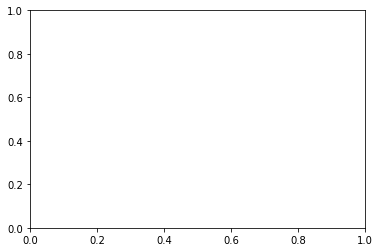

In [33]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

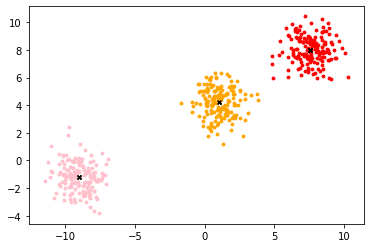

In [35]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(X[y_pred == i, 0],X[y_pred == i, 1]
                ,marker = 'o'
                ,s = 8
                ,c = color[i]
               )
    ax1.scatter(centroid[:,0],centroid[:,1]
                ,marker = 'x'
                ,s = 15
                ,c="black"
               )
plt.show()

## 基于轮廓体系来选择n_clusters

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

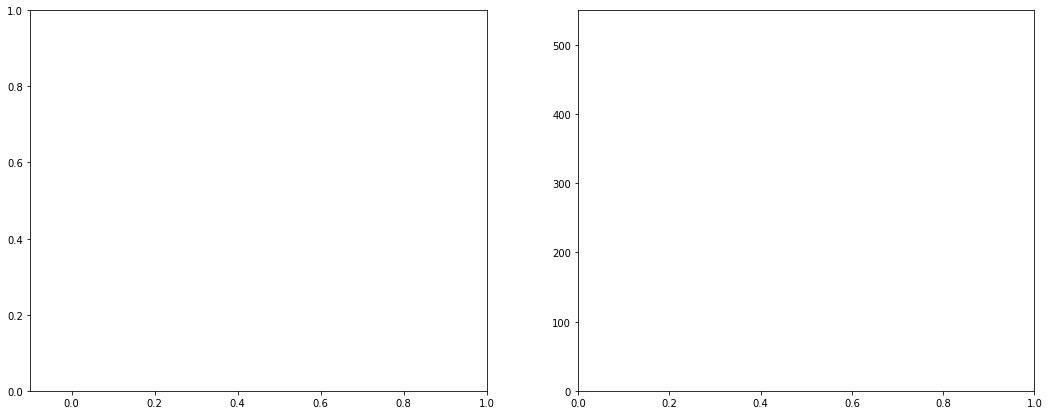

In [8]:
n_clusters = 4
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])
ax2.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

In [9]:
n_clusters = 4
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])
ax2.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters = ", n_clusters, "The average silhouette_score is:", silhouette_avg)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters =  4 The average silhouette_score is: 0.571089744201128


In [10]:
n_clusters = 4
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])
ax2.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters = ", n_clusters, "The average silhouette_score is:", silhouette_avg)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      ,ith_cluster_silhouette_values
                      ,facecolor = color
                      ,alpha = 0.7
                     )
    ax1.text(-0.05
             ,y_lower + 0.5 * size_cluster_i
             ,str(i)
            )
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red",linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

For n_clusters =  4 The average silhouette_score is: 0.571089744201128


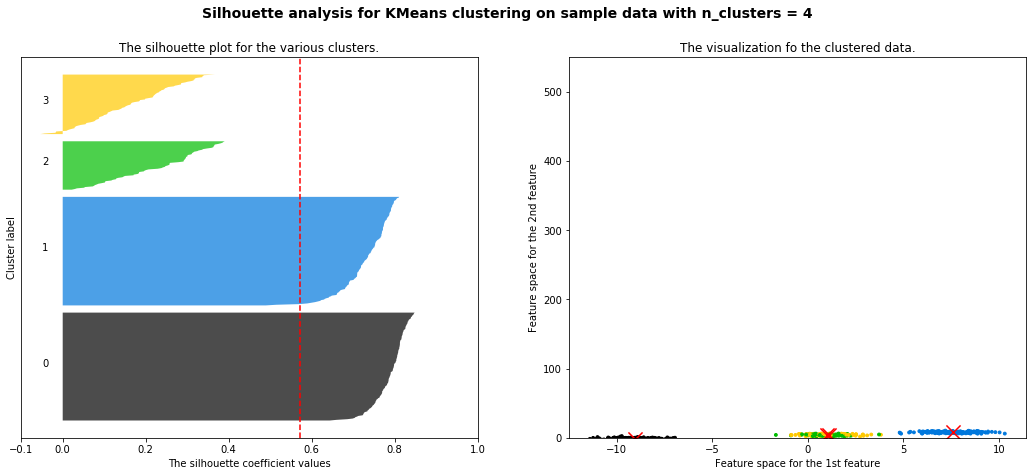

In [12]:
n_clusters = 4
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])
ax2.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
cluster_labels = clusterer.labels_

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters = ", n_clusters, "The average silhouette_score is:", silhouette_avg)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                      ,ith_cluster_silhouette_values
                      ,facecolor = color
                      ,alpha = 0.7
                     )
    ax1.text(-0.05
             ,y_lower + 0.5 * size_cluster_i
             ,str(i)
            )
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red",linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax2.scatter(X[:,0], X[:,1]
            ,marker = 'o'
            ,s = 8
            ,c=colors
           )
centers = clusterer.cluster_centers_
ax2.scatter(centers[:,0]
            ,centers[:,1]
            ,marker='x'
            ,c="red"
            ,alpha=1
            ,s=200
           )

ax2.set_title("The visualization fo the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters)
             ,fontsize=14
             ,fontweight='bold'
            )
plt.show()

For n_clusters =  2 The average silhouette_score is: 0.6598812533982484


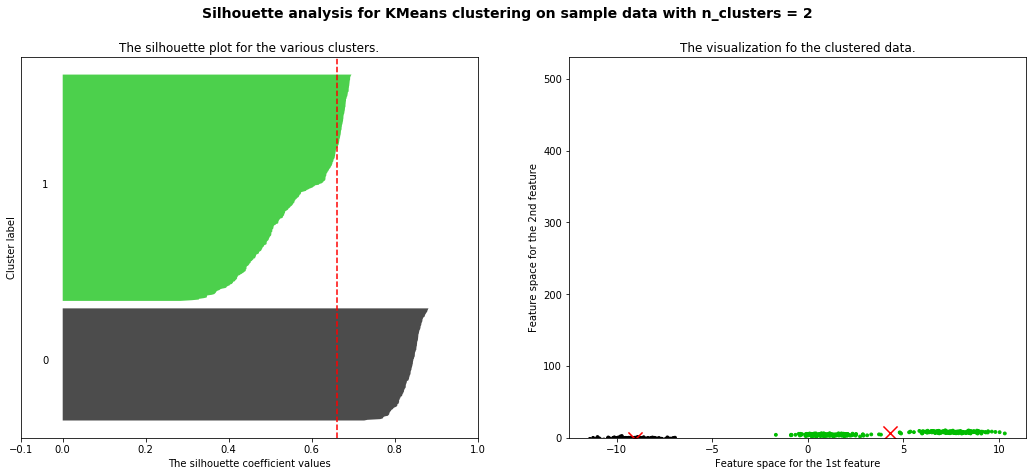

For n_clusters =  3 The average silhouette_score is: 0.7593747124719952


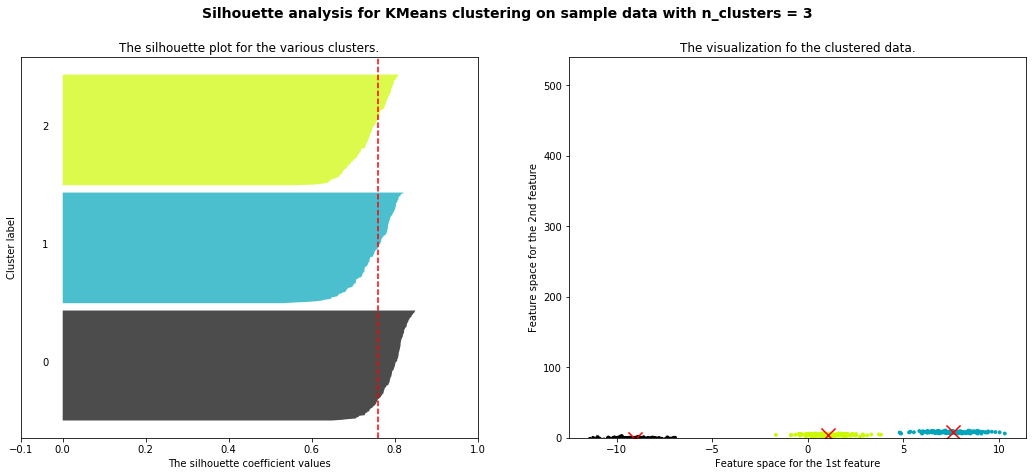

For n_clusters =  4 The average silhouette_score is: 0.571089744201128


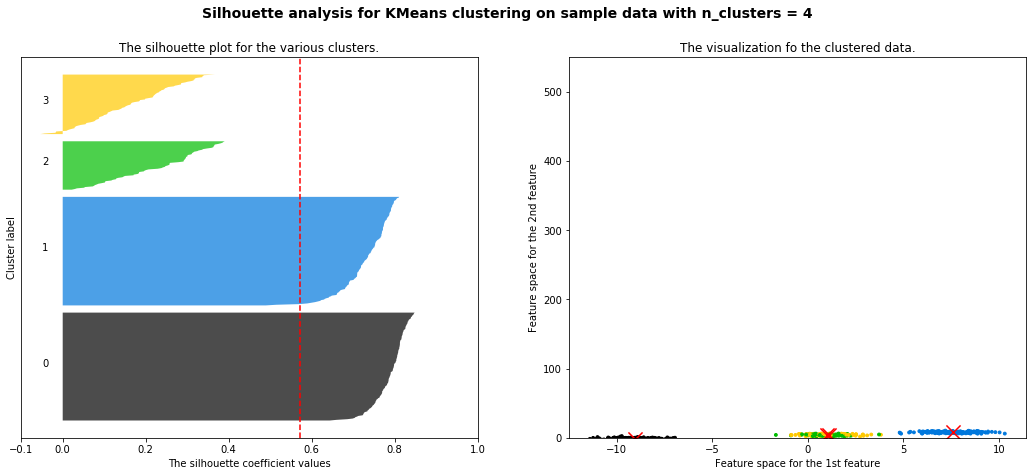

For n_clusters =  5 The average silhouette_score is: 0.38720950210310284


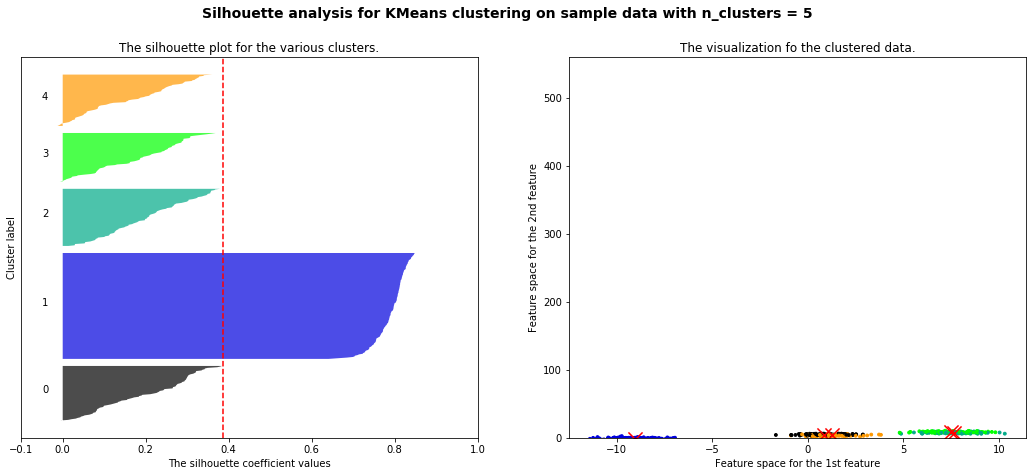

For n_clusters =  6 The average silhouette_score is: 0.1877459519293102


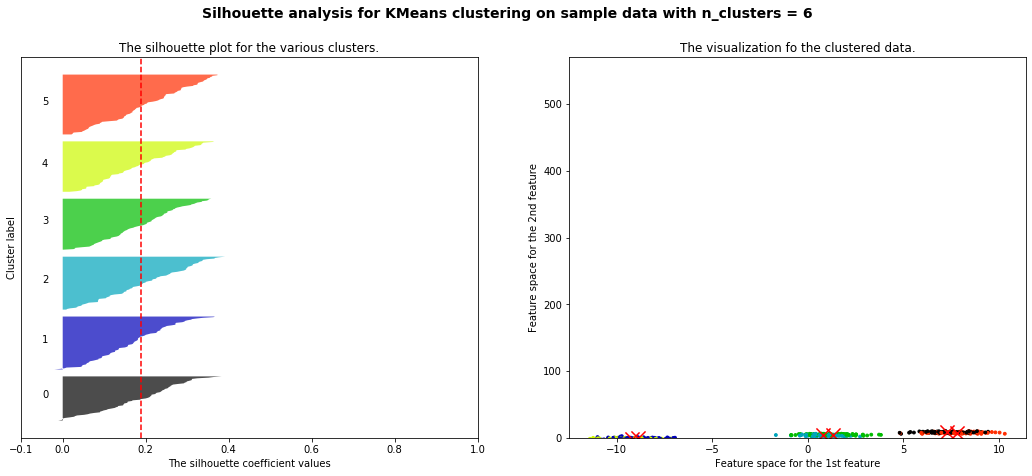

For n_clusters =  7 The average silhouette_score is: 0.18189930581621083


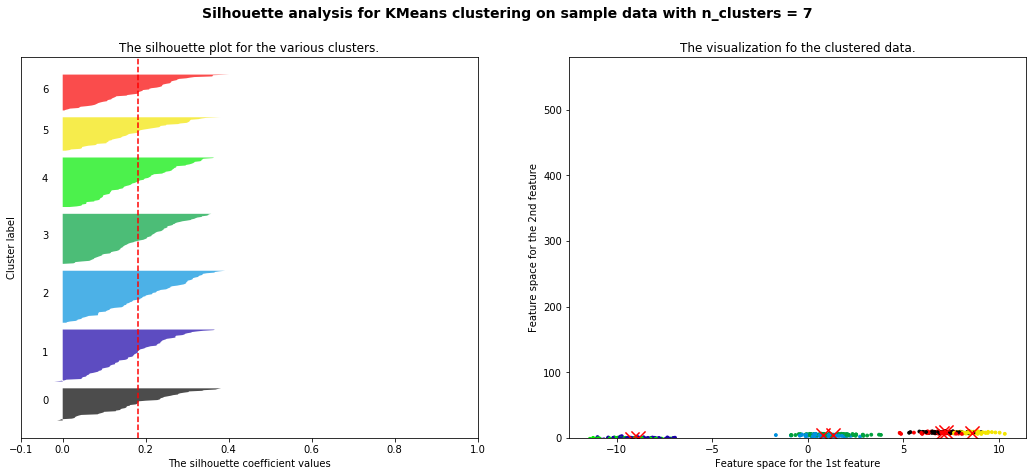

In [4]:
for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax2.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters, "The average silhouette_score is:", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor = color
                          ,alpha = 0.7
                         )
        ax1.text(-0.05
                 ,y_lower + 0.5 * size_cluster_i
                 ,str(i)
                )
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red",linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(X[:,0], X[:,1]
                ,marker = 'o'
                ,s = 8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0]
                ,centers[:,1]
                ,marker='x'
                ,c="red"
                ,alpha=1
                ,s=200
               )

    ax2.set_title("The visualization fo the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters)
                 ,fontsize=14
                 ,fontweight='bold'
                )
    plt.show()

## Kmeans做矢量化

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [6]:
china = load_sample_image("china.jpg")

In [7]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [8]:
china.dtype

dtype('uint8')

In [9]:
china.shape

(427, 640, 3)

In [10]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [11]:
newimage = china.reshape((427* 640, 3))

In [14]:
len(newimage)

273280

In [13]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

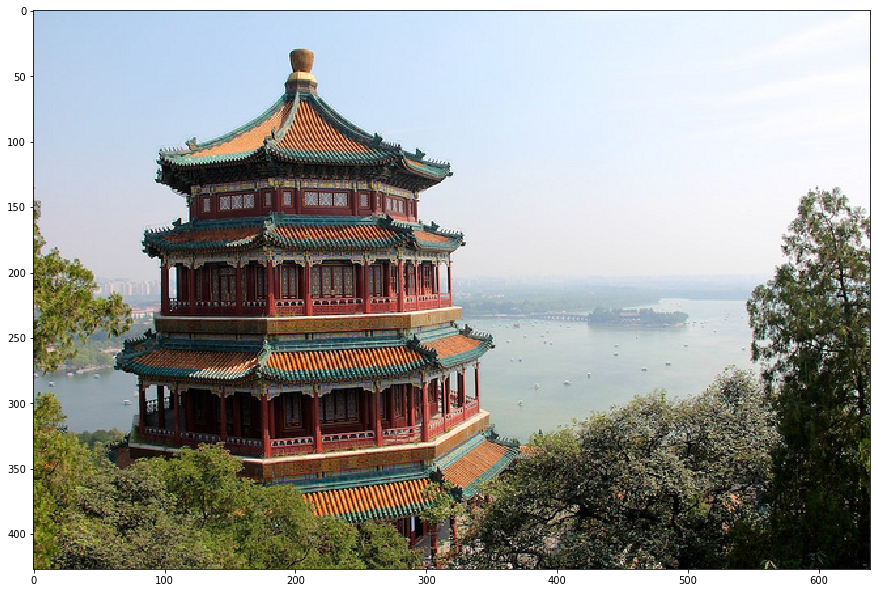

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(china)

In [16]:
n_clusters = 64

china = np.array(china, dtype=np.float64) / china.max()
w,h,d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [18]:
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [20]:
# 对数据进行K-Means的矢量量化
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [23]:
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [24]:
image_kmeans = image_array.copy()
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [25]:
image_kmeans

array([[0.73557423, 0.8162465 , 0.91134454],
       [0.73557423, 0.8162465 , 0.91134454],
       [0.73557423, 0.8162465 , 0.91134454],
       ...,
       [0.15496138, 0.15995247, 0.12477718],
       [0.07029412, 0.07941176, 0.04921569],
       [0.07029412, 0.07941176, 0.04921569]])

In [26]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [27]:
image_kmeans = image_kmeans.reshape(w,h,d)

In [28]:
image_kmeans.shape

(427, 640, 3)

In [29]:
# 对数据进行随机的矢量量化
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
lables_random = pairwise_distances_argmin(centroid_random, image_array, axis=0)

NameError: name 'pairwise_distances_argmin' is not defined

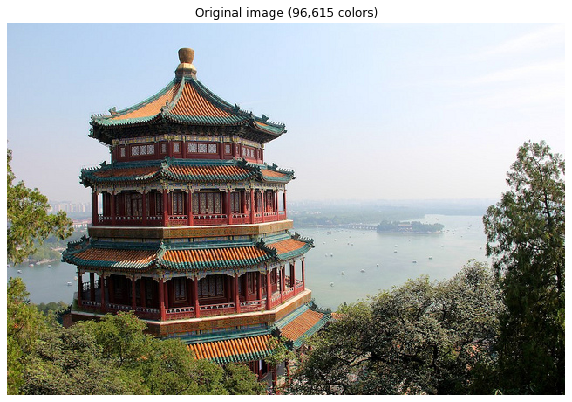

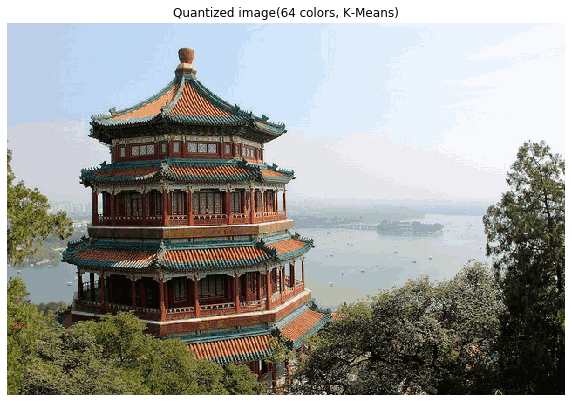

In [31]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image(64 colors, K-Means)')
plt.imshow(image_kmeans)